In [34]:
import tensorflow as tf
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os

In [35]:
def plot_waveform(audio, sr, title):
    # plot the first audio file
    d = len(audio) / sr
    t = np.linspace(0, d, len(audio))
    plt.figure(figsize=(14, 5))
    plt.plot(t, audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform of ' + title)

In [96]:
def plot_specgram(audio, sr, title):
    # plot the spectrogram
    X = librosa.stft(audio)
    Xdb = librosa.amplitude_to_db(abs(X))
    print(X.shape)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('Spectrogram of ' + title)

In [37]:
def plot_mfcc(audio, sr, title):
    # plot the MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCC of ' + title)

In [73]:
def plot_mel_spectogram(audio, sr, title, n_fft, hop_length, n_mels):
    # plot the mel spectogram
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    print("nilai mel spectogram")
    print(S, S.shape)
    print("nilai log mel spectogram")
    print(log_S, log_S.shape)
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('Mel Spectrogram of ' + title)    

In [39]:
files = []

# iterate over all files in data folder
for file in os.listdir('test_data'):
    if file.endswith('.wav'):
        files.append(file)
files.sort()

In [40]:
audios = []
for file in files:
    audio, sr = librosa.load('test_data/' + file, res_type='soxr_vhq')
    file = tf.io.read_file('test_data/' + file)
    tf_audio, tf_sr = tf.audio.decode_wav(file)
    tf_sr = tf_sr.numpy()
    print(f"Sample rate tf: {tf_sr}")
    print('Audio length: ' + str(len(audio) / sr) + ' seconds')
    print('Sampling rate: ' + str(sr) + ' Hz')
    print("=====================================")
    audios.append(audio)

Sample rate tf: 22050
Audio length: 5.773061224489796 seconds
Sampling rate: 22050 Hz
Sample rate tf: 44100
Audio length: 3.814965986394558 seconds
Sampling rate: 22050 Hz
Sample rate tf: 22050
Audio length: 6.242902494331066 seconds
Sampling rate: 22050 Hz
Sample rate tf: 22050
Audio length: 4.937142857142857 seconds
Sampling rate: 22050 Hz
Sample rate tf: 22050
Audio length: 3.6829024943310658 seconds
Sampling rate: 22050 Hz
Sample rate tf: 22050
Audio length: 5.903673469387755 seconds
Sampling rate: 22050 Hz
Sample rate tf: 44100
Audio length: 5.224489795918367 seconds
Sampling rate: 22050 Hz
Sample rate tf: 44100
Audio length: 8.96108843537415 seconds
Sampling rate: 22050 Hz
Sample rate tf: 44100
Audio length: 6.765714285714286 seconds
Sampling rate: 22050 Hz
Sample rate tf: 22050
Audio length: 6.426122448979592 seconds
Sampling rate: 22050 Hz


In [41]:
ipd.Audio(audios[0], rate=sr)

In [42]:
ipd.Audio(audios[1], rate=sr)

In [43]:
ipd.Audio(audios[2], rate=sr)

In [44]:
ipd.Audio(audios[3], rate=sr)

In [45]:
ipd.Audio(audios[4], rate=sr)

In [46]:
ipd.Audio(audios[5], rate=sr)

In [47]:
ipd.Audio(audios[6], rate=sr)

In [48]:
ipd.Audio(audios[7], rate=sr)

In [49]:
ipd.Audio(audios[8], rate=sr)

In [50]:
ipd.Audio(audios[9], rate=sr)

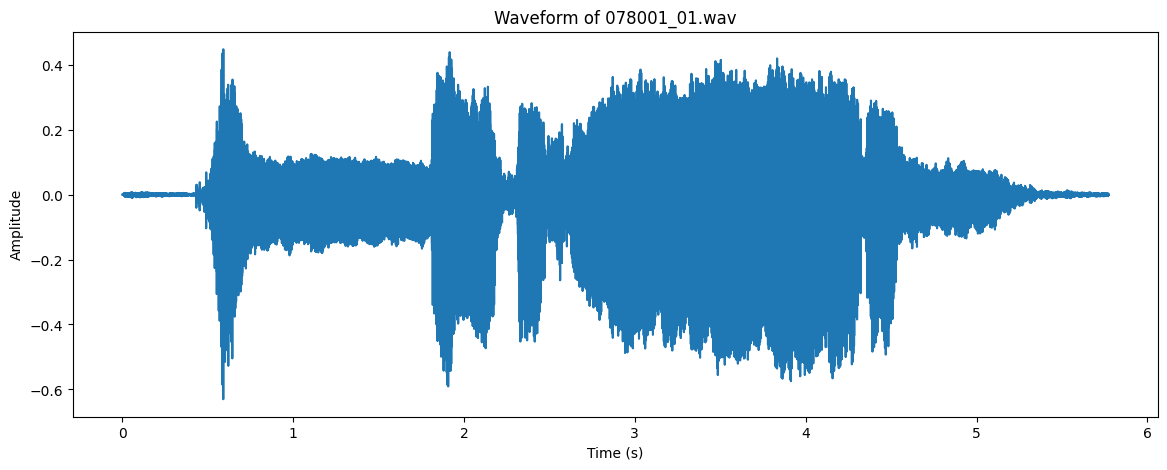

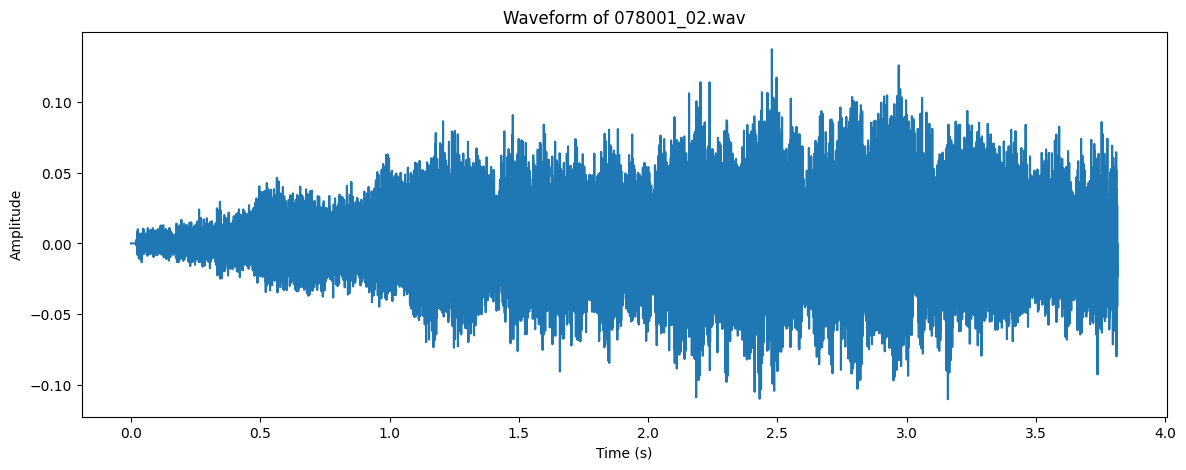

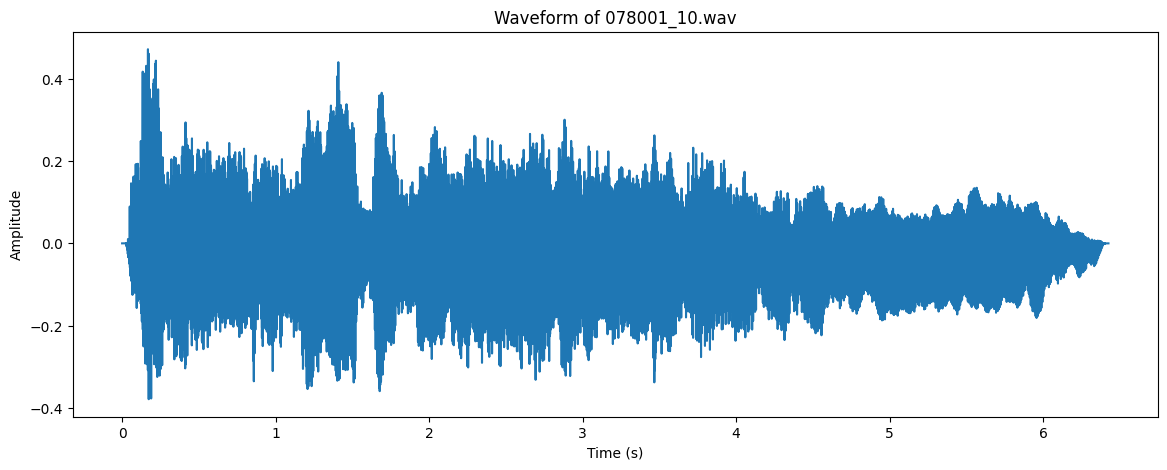

In [51]:
# plot the first audio file
plot_waveform(audios[0], sr, files[0])
plot_waveform(audios[1], sr, files[1])
plot_waveform(audios[9], sr, files[9])

(1025, 249)
(1025, 165)
(1025, 277)


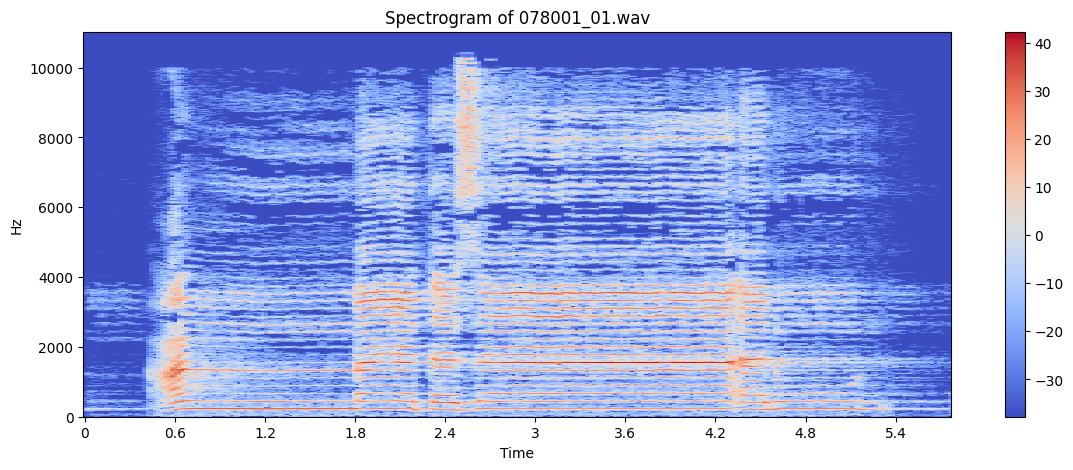

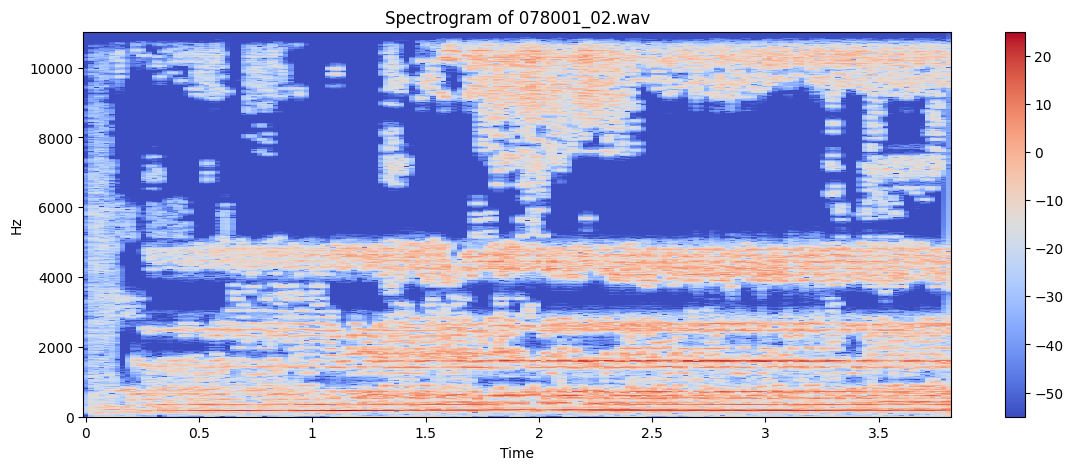

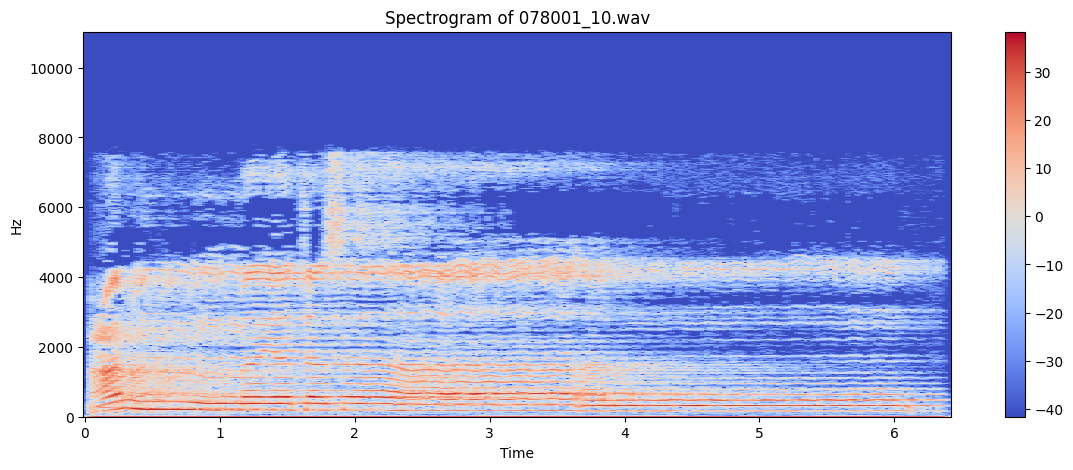

In [97]:
plot_specgram(audios[0], sr, files[0])
plot_specgram(audios[1], sr, files[1])
plot_specgram(audios[9], sr, files[9])

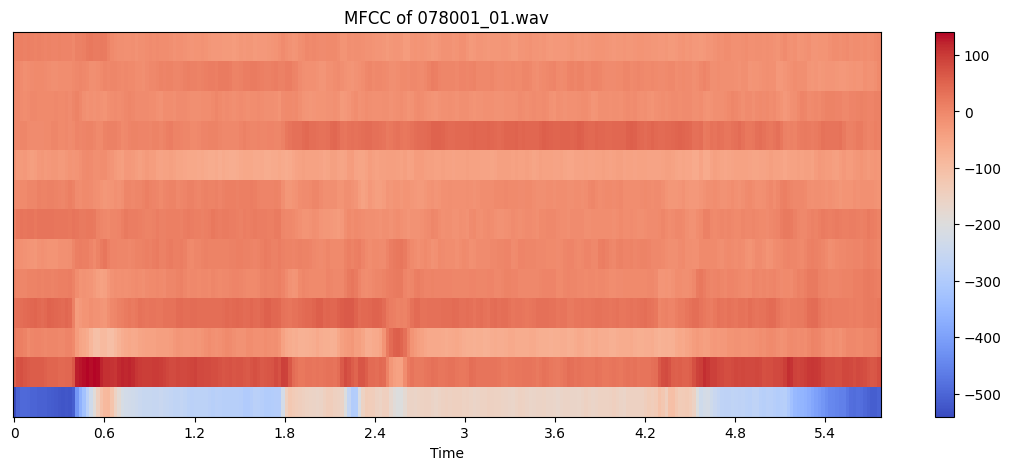

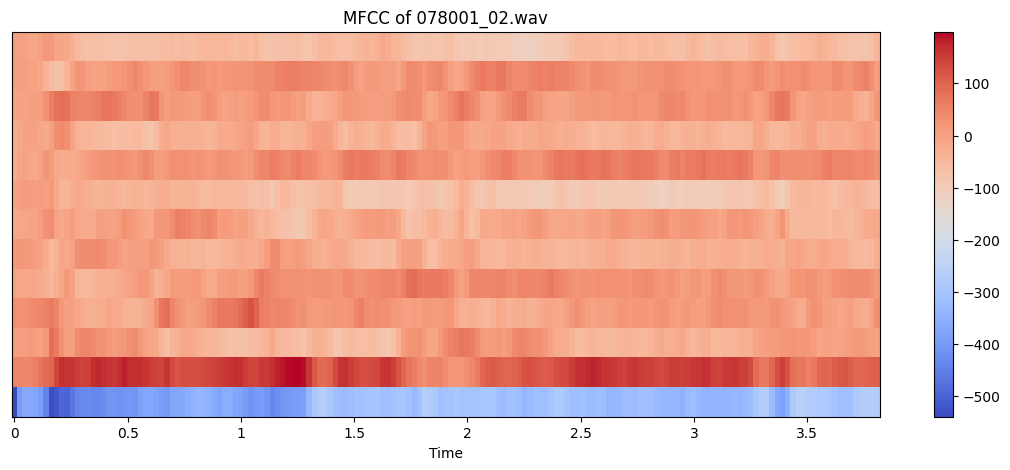

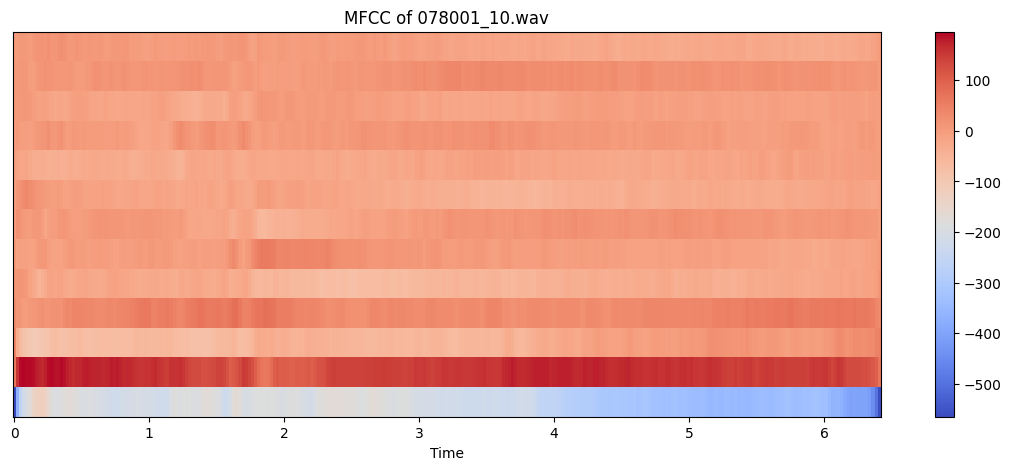

In [53]:
plot_mfcc(audios[0], sr, files[0])
plot_mfcc(audios[1], sr, files[1])
plot_mfcc(audios[9], sr, files[9])

In [85]:
len(audios[0])

127296

In [93]:
(127296-2048)/512+3

247.625

In [98]:
2048//2+1

1025

nilai mel spectogram
[[2.4767400e-05 7.4232856e-05 2.9035655e-04 ... 6.3455809e-04
  4.4541815e-04 3.0025077e-04]
 [4.7359827e-05 1.4965405e-04 1.2024554e-03 ... 5.7458930e-04
  6.2677334e-04 1.4090607e-03]
 [3.3704659e-05 1.3900449e-04 3.1126323e-04 ... 6.0927421e-05
  2.1724449e-04 4.9618172e-04]
 ...
 [1.1574787e-09 8.9279704e-09 1.4603023e-08 ... 1.1210510e-08
  1.5551755e-08 7.1053741e-08]
 [1.8791770e-09 2.6919742e-09 2.5741318e-09 ... 1.9449726e-09
  2.0947175e-09 6.1393628e-08]
 [2.1085322e-09 2.9571745e-09 2.1741986e-09 ... 3.7361234e-09
  2.9802507e-09 5.9666597e-08]] (128, 249)
nilai log mel spectogram
[[-72.52876  -67.761604 -61.83825  ... -58.442852 -59.97989  -61.692726]
 [-69.71346  -64.71668  -55.666878 ... -58.873993 -58.49646  -54.97827 ]
 [-71.19067  -65.03728  -61.536285 ... -68.61944  -63.098076 -59.511154]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.   

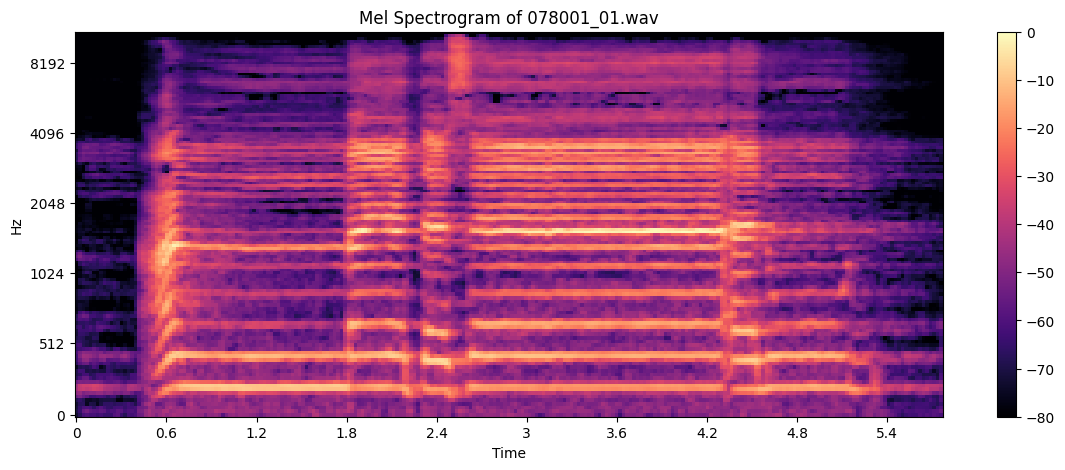

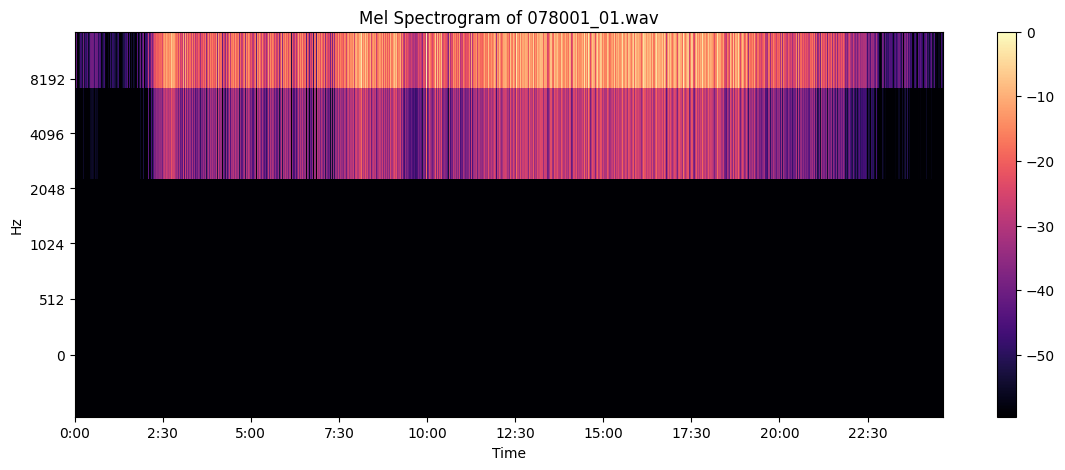

In [78]:
plot_mel_spectogram(audios[0], sr, files[0], n_fft=2048, hop_length=512, n_mels=128)
plot_mel_spectogram(audios[0], sr, files[0], n_fft=4, hop_length=2, n_mels=4)
# plot_mel_spectogram(audios[1], sr, files[1], n_fft=2048, hop_length=512, n_mels=128)
# plot_mel_spectogram(audios[9], sr, files[9], n_fft=2048, hop_length=512, n_mels=128)